---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins1 = penguins.dropna()

In [ ]:
penguins1.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
X = penguins1.loc[:, 'culmen_length_mm':'body_mass_g']

In [ ]:
y = penguins1.species_short

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
y_enc = encoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 123)  #changed this random state from 42 to 123 since the prediction was 100%

# Logistic Regression


In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

scores = cross_val_score(model, X_train, y_train)
print(scores)

[0.98148148 1.         1.         0.98113208 0.98113208]


In [ ]:
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9552238805970149


In [ ]:
target_names = encoder.inverse_transform(list(set(y_test))) 

y_pred = model.predict(X_test) 

print(classification_report(y_test, y_pred, target_names = target_names)) 

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        28
   Chinstrap       1.00      0.85      0.92        20
      Gentoo       1.00      1.00      1.00        19

    accuracy                           0.96        67
   macro avg       0.97      0.95      0.96        67
weighted avg       0.96      0.96      0.95        67



In [ ]:
!pip uninstall -qq mlxtend -y

In [ ]:
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.4MB 5.9MB/s 


In [ ]:
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6be37c8400>)

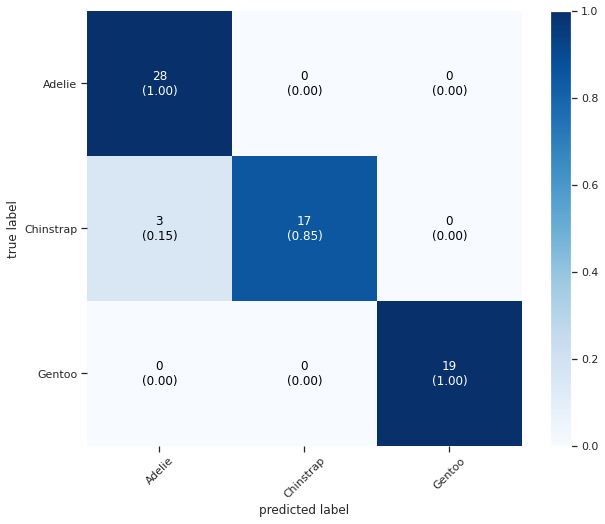

In [ ]:
confmatrix = confusion_matrix(y_test,y_pred) 

plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

The logistic regression model predicted 100% all the Adelie species and Gentoo species, and failed some Chinstrap species by confusing them with Adelie

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.98148148 1.         1.         0.90566038 0.9245283 ]


In [ ]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9402985074626866


strangely the logistic regression model was more accurate

In [ ]:
target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        28
   Chinstrap       0.94      0.85      0.89        20
      Gentoo       1.00      0.95      0.97        19

    accuracy                           0.94        67
   macro avg       0.95      0.93      0.94        67
weighted avg       0.94      0.94      0.94        67



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6bdff2dac8>)

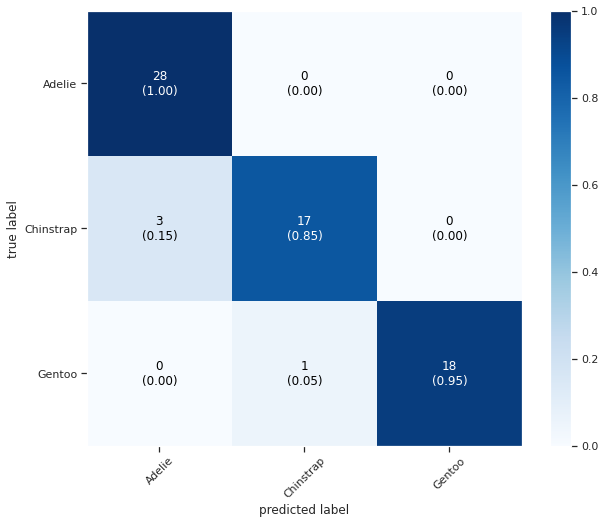

In [ ]:
confmatrix = confusion_matrix(y_test,y_pred) 
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)


same results as from logistic regression


# XGBoost


In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.98148148 1.         0.98113208 0.90566038 0.9245283 ]
0.9552238805970149


the exact same number as in logistic regression

In [ ]:
target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        28
   Chinstrap       1.00      0.85      0.92        20
      Gentoo       1.00      1.00      1.00        19

    accuracy                           0.96        67
   macro avg       0.97      0.95      0.96        67
weighted avg       0.96      0.96      0.95        67



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6bdff02ef0>)

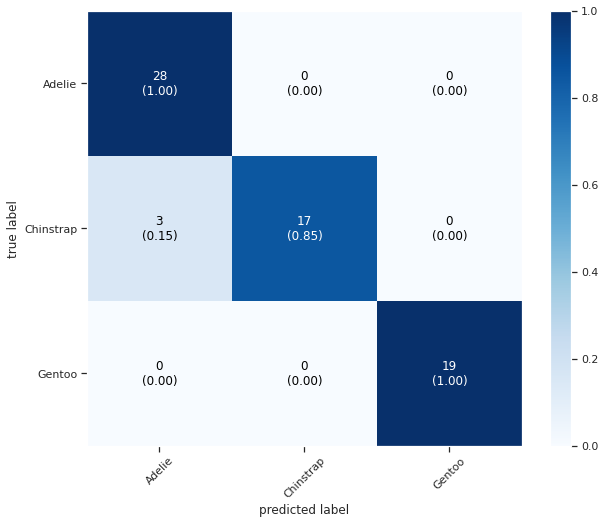

In [ ]:
confmatrix = confusion_matrix(y_test,y_pred) 

plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

same results using all three different techniques